In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

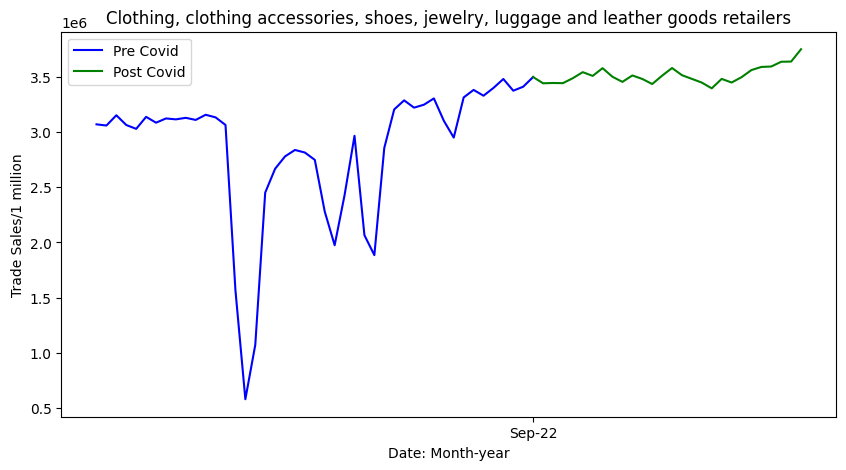

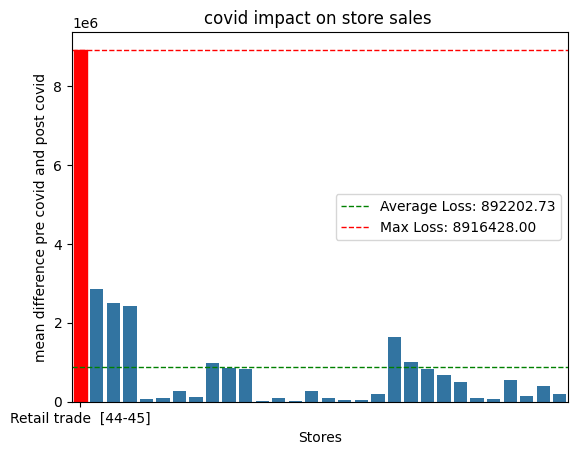

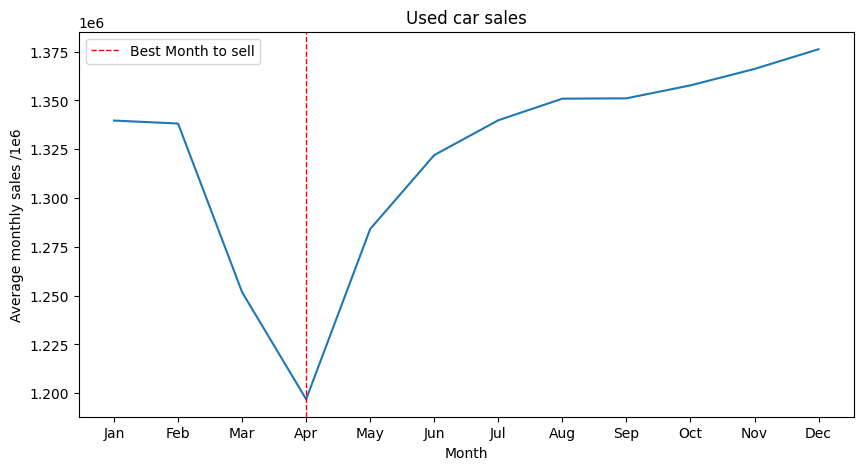

In [191]:

def q1():
  data = pd.read_csv("datafileA5.csv")
  industry = data.columns[0]
  d = data[data[industry] == "Clothing, clothing accessories, shoes, jewelry, luggage and leather goods retailers  [458]"]
  x = d.columns[1:]
  y = d.values[0][1:]
  for i in range(len(x)):
      y[i] = int(y[i].replace(",",""))
  i = np.where(x == "Sep-22")[0][0]
  pre_y = y[:i+1]
  post_y = y[i:]
  pre_x = x[:i+1]
  post_x = x[i:]
  plt.figure(figsize=(10, 5))
  sns.lineplot(x=pre_x,y=pre_y, color='blue', label="Pre Covid")
  sns.lineplot(x=post_x,y=post_y, color='green', label="Post Covid")
  plt.xticks(["Sep-22"])
  plt.title("Clothing, clothing accessories, shoes, jewelry, luggage and leather goods retailers")
  plt.xlabel("Date: Month-year")
  plt.ylabel("Trade Sales/1 million")
  plt.show()
def q2():
  data = pd.read_csv("datafileA5.csv")
  x = data.columns[1:]
  y = data.values[:,1:]
  n = np.where(x == "Sep-22")[0][0]
  for i in range(len(y)):
    for j in range(len(x)):
      y[i,j] = int(y[i,j].replace(",",""))
  pre_y = data.values[:,1:n+1]
  post_y = data.values[:,n+1:]
  arr = np.zeros(len(pre_y))
  for i in range(len(pre_y)):
    arr[i] = np.round(post_y[i].mean()-pre_y[i].mean())
  maxval = np.argmax(arr)
  x = data.values[:,0:1].flatten()
  visual = sns.barplot(x = x, y = arr)
  plt.axhline(arr.mean(), color='green', linestyle='dashed', linewidth=1, label=f'Average Loss: {arr.mean():.2f}')
  plt.axhline(arr[maxval], color='red', linestyle='dashed', linewidth=1, label=f'Max Loss: {arr[maxval]:.2f}')
  visual.patches[maxval].set_color('red')
  plt.xticks([x[maxval]])
  plt.legend()
  plt.xlabel("Stores")
  plt.ylabel("mean difference pre covid and post covid")
  plt.title("covid impact on store sales ")
  plt.show()
def q3():
    data = pd.read_csv("datafileA5.csv")
    industry = data.columns[0]
    d = data[data[industry] == "Used car dealers  [44112]"]
    x = d.columns[1:]
    y = d.values[0][1:]
    for i in range(len(x)):
        y[i] = int(y[i].replace(",",""))
    # array for months in the year
    arr = np.zeros((12))
    months = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    div = len(x)//12
    for i in range(len(x)):
        index = i%12
        arr[index] = arr[index]+y[i]
    for i in range(len(arr)):
        arr[i] = np.round(arr[i]/div)
    besttime = np.argmin(arr)
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=months,y=arr)
    plt.axvline(x=besttime, color='red', linestyle='dashed', linewidth=1, label="Best Month to sell")
    plt.legend()
    plt.xlabel("Month")
    plt.ylabel("Average monthly sales /1e6")
    plt.title("Used car sales")
    plt.show()
q1()
q2()
q3()

In [ ]:
"""
for q1 to show performance post covid i made a line graph and highlighted the
line green after covid. here we can see what the sales were like during covid
and then after
for q2 i calculated the mean for each trade pre covid and post covid,
then i subtracted them calculating the difference in sales. I used a barplot to
effectively highligh the business with the most impact.
for q3 i calculated the average for each month and plotted that average on a line graph
the best time to sell would be when there's less competition so I highlighted
that with a verticalline